In [1352]:
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib
from tqdm import tqdm
import torch
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import svm
from sklearn import preprocessing
from sklearn.ensemble import GradientBoostingClassifier

In [1353]:
train = pd.read_csv('./data/train.csv')
submission = pd.read_csv('./data/test.csv')

In [1354]:
labels = train['Survived'].copy().astype('int')
labels

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int32

In [1355]:
sexLe = preprocessing.LabelEncoder()
sexLe.fit(['female', 'male'])

LabelEncoder()

In [1356]:
data = train[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']].copy()

data['Sex'] = sexLe.transform(data['Sex'])
mean_age = data['Age'].mean()
std_age = data['Age'].std()
data['Age'].fillna(mean_age, inplace=True)
# data['Age'] = (data['Age'] - mean_age) / std_age

mean_fare = data['Fare'].mean()
std_fare = data['Fare'].std()
data['Fare'].fillna(mean_fare, inplace=True)
# data['Fare'] = (data['Fare'] - mean_fare) / std_fare

data['S'] = (data['Embarked'] == 'S').astype('float32')
data['C'] = (data['Embarked'] == 'C').astype('float32')
data['Q'] = (data['Embarked'] == 'Q').astype('float32')

data.drop(columns='Embarked', inplace=True)

data['Pclass'].fillna(3, inplace=True)

data['Pclass'] = 4 - data['Pclass']

sub = submission[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']].copy()

sub['Sex'] = sexLe.transform(sub['Sex'])
sub['Age'].fillna(mean_age, inplace=True)
# sub['Age'] = (sub['Age'] - mean_age) / std_age
sub['Fare'].fillna(mean_fare, inplace=True)
# sub['Fare'] = (sub['Fare'] - mean_fare) / std_fare

sub['S'] = (sub['Embarked'] == 'S').astype('float32')
sub['C'] = (sub['Embarked'] == 'C').astype('float32')
sub['Q'] = (sub['Embarked'] == 'Q').astype('float32')

sub.drop(columns='Embarked', inplace=True)

sub['Pclass'].fillna(3, inplace=True)

sub['Pclass'] = 4 - sub['Pclass']

In [1357]:
# data = data[['Pclass', 'Sex', 'Age', 'Fare']]
# sub = sub[['Pclass', 'Sex', 'Age', 'Fare']]

In [1358]:
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.3, random_state=100)

In [1359]:
# classifier = svm.SVC()
classifier = GradientBoostingClassifier(max_depth=3, learning_rate=0.1, n_estimators=500)

classifier.fit(X_train, y_train)

GradientBoostingClassifier(n_estimators=500)

In [1360]:
y_pred = classifier.predict(X_test)
yt_pred = classifier.predict(X_train)

In [1361]:
print("Test score ", classifier.score(X_test, y_test))
print("Train score ", classifier.score(X_train, y_train))

Test score  0.8022388059701493
Train score  0.9791332263242376


In [1362]:
from sklearn import metrics

In [1363]:
conf_test = metrics.confusion_matrix(y_test, y_pred)
conf_train = metrics.confusion_matrix(y_train, yt_pred)

<AxesSubplot: >

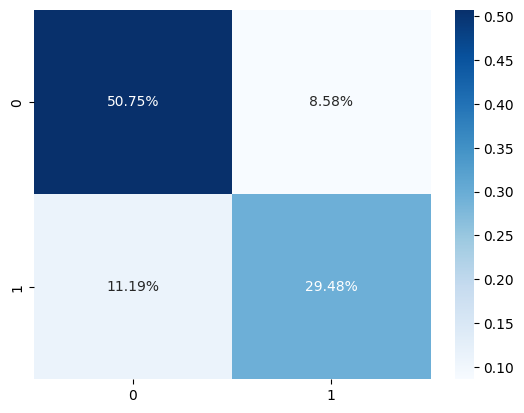

In [1364]:
sns.heatmap(conf_test / np.sum(conf_test), annot=True, fmt='.2%', cmap='Blues')

<AxesSubplot: >

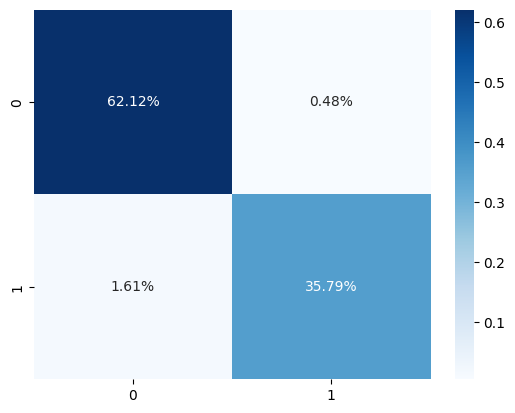

In [1365]:
sns.heatmap(conf_train / np.sum(conf_train), annot=True, fmt='.2%', cmap='Blues')

In [1366]:
submission_pred = classifier.predict(sub)

In [1367]:
submission['Survived'] = submission_pred
df = submission[['PassengerId', 'Survived']]
df.to_csv('data/submission.csv', index=False)
df

PassengerId  Survived
0            892         0
1            893         0
2            894         1
3            895         0
4            896         0
..           ...       ...
413         1305         0
414         1306         1
415         1307         0
416         1308         0
417         1309         0

[418 rows x 2 columns]

In [1368]:
classifier.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'log_loss',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 500,
 'n_iter_no_change': None,
 'random_state': None,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}